# Activity: Simple Linear Regression - California Housing Dataset

### Overview

Building on our earlier engagements with data, this session introduces us to the domain of predictive analytics using the California Housing dataset. We'll learn how one predictor can be utilized to estimate the output, serving as our initiation into machine learning models.

### Objective

Our main goal is to acquaint ourselves with the basics of simple linear regression. We aim to implement this foundational model, gauge its performance, and visually comprehend how predictions correspond with actual data points.

### What We Will Do:

1. **Data Exploration:** Dive deep into the California dataset, grasping its structure, contents, and unique attributes.
2. **Implementing Simple Linear Regression:** Set the stage for machine learning by employing a straightforward regression model, utilizing median income as our predictor.
3. **Model Evaluation on Test Data:** After training, we'll assess the model's prowess on unseen data, gaining insights into its accuracy and reliability.
4. **Visualization of Model's Performance:** It's time for some visual analytics. By juxtaposing our model's predictions with real values, we'll grasp its strengths and pinpoint areas that might need further refinement.

At the conclusion of this activity, we will be equipped with a deeper understanding of simple linear regression, enriching our toolkit for more advanced analytical ventures in future sessions.

---

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing # to Load the california housing dataset

from sklearn.model_selection import train_test_split #to split the data into training set and test set
from sklearn.preprocessing import StandardScaler # For Feature scaling : Standardization 

from sklearn.linear_model import LinearRegression # For Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score # For Linear Regression Metrics

## 2. Loading the California Housing Dataset

**Objective:** Load the California housing dataset from scikit-learn and understand the structure of the returned object.

In [3]:
data = fetch_california_housing()

The `data` object is a Bunch object provided by scikit-learn. It's similar to a dictionary and contains multiple attributes related to the dataset

For a deeper understanding of the structure and components of the returned data object, consult the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) of the fetch_california_housing function.

### 1. Understanding the `fetch_california_housing` Data Object

**Objective:** Explore and understand the structure of the data object returned by the `fetch_california_housing` function.

- **Retrieve the keys of the `data` object**

The `data` object is a Bunch object, which behaves similarly to a Python dictionary. The keys represent different components of the dataset, such as the feature matrix, target variable, feature names, and dataset description.

In [3]:
keys = data.keys()
print("Keys in the data object:", keys)

Keys in the data object: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


- **Understand each key in the `data` object**

In [4]:
feature_matrix_shape = data.data.shape
print("Shape of the feature matrix:", feature_matrix_shape)

Shape of the feature matrix: (20640, 8)


The data key inside the data object holds the feature matrix. Its shape indicates there are 20,640 districts (rows) described by 8 features (columns).

- **Inspect the shape and first few entries of the feature matrix and target**

In [5]:
print("First row of feature matrix:", data.data[0])
print("\nShape of target array:", data.target.shape)
print("First entry of target array:", data.target[0])

First row of feature matrix: [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

Shape of target array: (20640,)
First entry of target array: 4.526


The first row of the feature matrix provides values for the 8 features for the first district. 

The target array has a shape of (20640,), indicating there are 20,640 target values (median house values) corresponding to the 20,640 districts. 

The first target value corresponds to the median house value of the first district.

- **View the feature names & Target name**

In [6]:
print("Feature Names:", data.feature_names)

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


These are the names of the 8 features present in the dataset, which include attributes like Median Income, House Age, Average Rooms, etc.

In [8]:
print("Target Name:", data.target_names)

Target Name: ['MedHouseVal']


The target variable represents the median house value for the districts in California.

- **Examine the dataset's description.**

In [7]:
print("\nDataset Description:\n", data.DESCR)


Dataset Description:
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

T

The dataset's description provides background information, details about the source, context of the dataset, features description, and other relevant information. For instance, it informs us that the dataset is derived from the 1990 U.S. census.

### 2. Structuring the Data in a DataFrame

**Objective:** Organize the California housing dataset into a pandas DataFrame for easier data manipulation and analysis.

In [4]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedianHouseValue'] = data.target

print("\nFirst few rows of the DataFrame:")
df.head(2)


First few rows of the DataFrame:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


## 3. Exploratory Data Analysis

### 1. Data Inspection and Descriptive Statistics

**Objective:** Begin your EDA by understanding the structure of the dataset, deriving basic statistics, and identifying anomalies like missing values and duplicate rows.

- **Data Overview:**

In [27]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


From the initial rows, it seems that features like `MedInc` (median income), `HouseAge` (housing median age), and possibly geographical features (`Latitude` and `Longitude`) might have a noticeable impact on the `MedianHouseValue`.

This is because house values are often directly influenced by the economic status of an area, the age of the houses (indicating either historical value or possible depreciation), and the specific location, with coastal or urban areas often having higher values than remote or rural regions.

- **Dataset Summary:**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The dataset has 8 features (like `MedInc`, `HouseAge`, etc.) and one target column (`MedianHouseValue`). All of them are of `float64` data type.

- **Descriptive Statistics:**

In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Features with a suspiciously high standard deviation or outliers

1. **MedInc (Median Income):** 
   - Standard Deviation: 1.899822 
   - This suggests variability in the income across districts in California. The max value is 15.000100, which is quite a distance from the 75th percentile value of 4.743250, indicating potential outliers or districts with exceptionally high median incomes.

2. **AveRooms (Average Rooms):**
   - Standard Deviation: 2.474173 
   - The max value is 141.909091, which is notably far from the 75th percentile value of 6.052381. This suggests the presence of districts with a very high average number of rooms, which might be outliers or large properties.

3. **Population:** 
   - Standard Deviation: 1132.462122 
   - With a maximum value of 35682 and a 75th percentile of 1725, there's a strong indication of districts with exceptionally high populations, which can be considered as potential outliers.

4. **AveBedrms (Average Bedrooms):** 
   - Standard Deviation: 0.473911 
   - The maximum value of 34.066667 is distant from its 75th percentile value of 1.099526, suggesting outliers or properties with an unusually high number of bedrooms.

5. **AveOccup (Average Occupancy):** 
   - Standard Deviation: 10.386050 
   - The max value is a significant 1243.333333, compared to the 75th percentile of 3.282261. This indicates there are some districts with extremely high average occupancy, which might be due to large households or perhaps data errors.

**Conclusion:**

The features `MedInc`, `AveRooms`, `Population`, `AveBedrms`, and `AveOccup` have high standard deviations and potential outliers, as evidenced by the large gap between the maximum values and the 75th percentile values.

These outliers can arise from genuine socio-economic disparities across different regions of California. For instance, some areas might have larger properties, leading to higher average rooms, while others might have dense populations. However, it's also essential to consider data collection errors or anomalies, especially for features like `AveOccup` with extreme maximum values. Further investigation using techniques like box plots or scatter plots can help visualize these potential outliers for better decision-making.

- **Missing Values:**

In [26]:
missing_values = df.isnull().sum()
print(f"Number of column with missing value: {len(missing_values[missing_values > 0])}")

Number of columns with NA value: 0


There are no missing values in this dataset, as indicated by the result of

The absence of missing values suggests that a rigorous data collection process was followed, or preprocessing steps were taken to impute or remove any incomplete records before the dataset's release. This is beneficial as it means that we have a complete dataset to work with, reducing potential biases or inaccuracies that might arise from missing data.

- **Duplicate Rows:**

In [23]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


There are no duplicate rows in this dataset, as indicated by the result of 

### 2. Visualizing Data Distribution

**Objective:** Understand the distribution of individual features in the dataset.

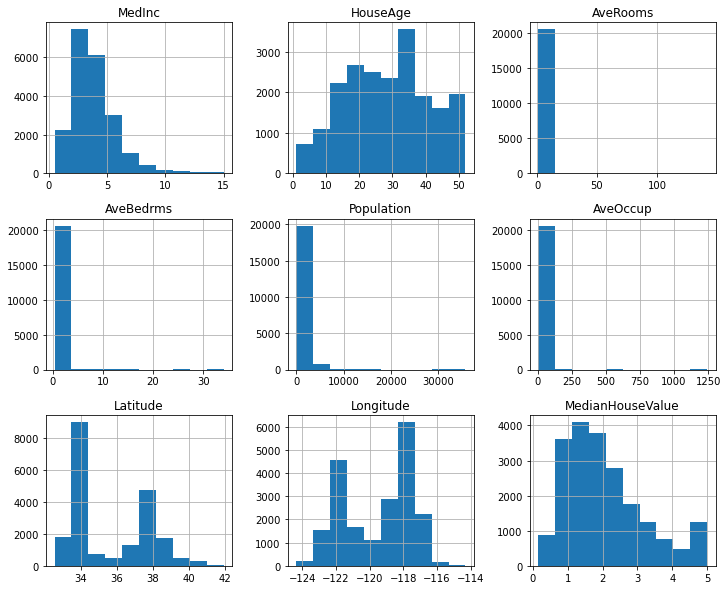

In [19]:
df.hist(figsize=(12,10), bins = 10)
plt.show()

Summary:

- **MedInc (Median Income)** exhibits a shape resembling a normal distribution with a noticeable peak on the left, suggesting a slight right skew.
  
- **HouseAge (House Age)** has a bell-like shape but features a significant peak around the 50-year mark, possibly signifying a construction boom during that period.

- Features like **AveRooms (Average Rooms)**, **AveBedrms (Average Bedrooms)**, **AveOccup (Average Occupancy)**, and **Population** show a pronounced right skew. This indicates a clustering of data on the left, but with certain high-value outliers. In the case of MedInc, fewer high-income households are evident compared to middle and low-income ones.

- **Longitude** has a mild left skew, with a concentration of areas on the right side of the plot.

- Both **Latitude** and **Longitude** display distinct peaks, hinting at specific geographic regions with more data points, likely due to higher population or more recorded areas.

- **MedianHouseValue** has a noticeable peak around the 5 mark, potentially indicating a prevalent value for house prices or a possible cap in the dataset.

Overall, these histograms offer essential insights into the distribution of each feature, aiding in further data analysis and preprocessing considerations.

### 3. Inspecting Feature Spread with Boxplots

**Objective:** Create boxplots to delve deeper into the spread and outliers of each feature in the dataset.

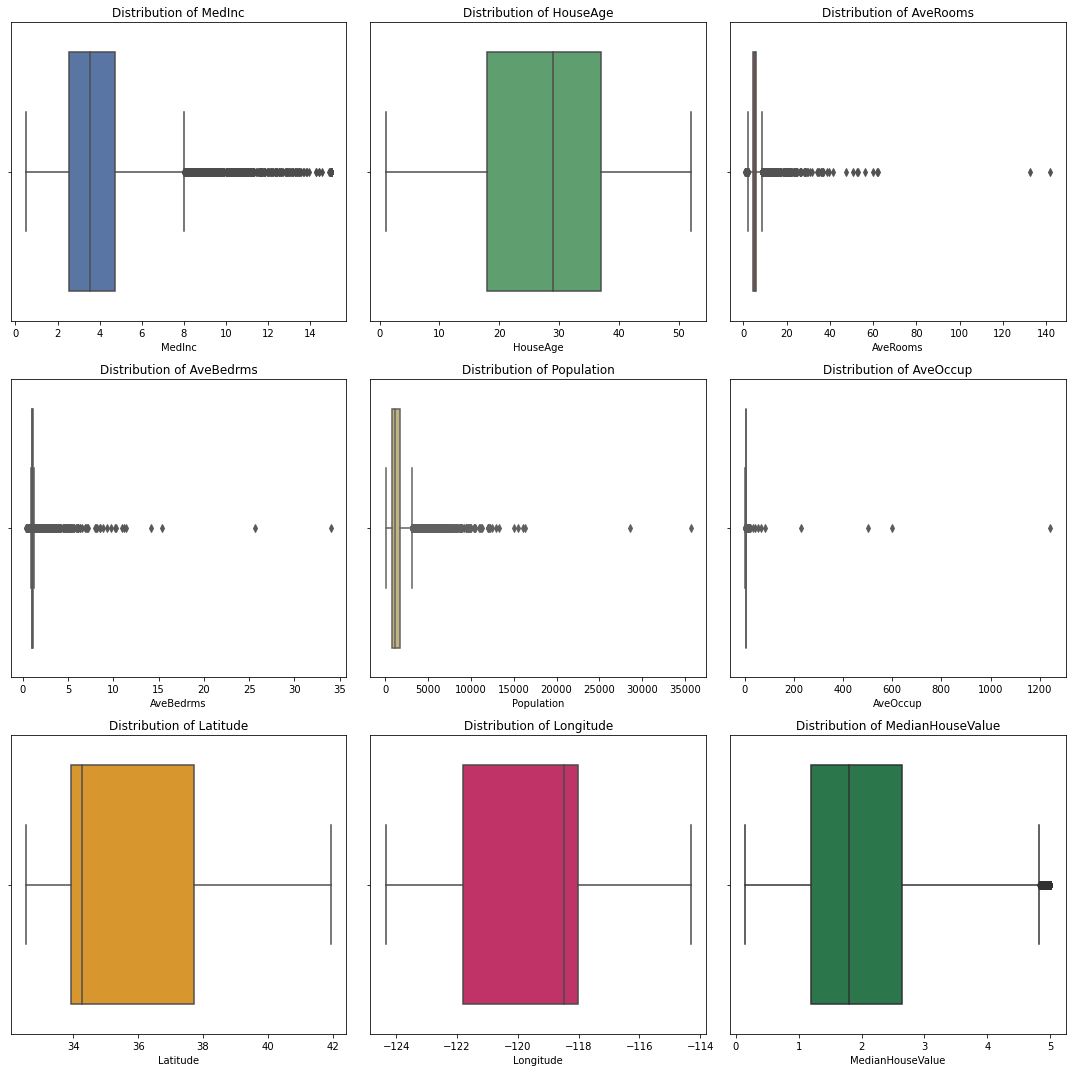

In [26]:
# Get the list of column name
features = df.columns

# List of colors (You can modify this list or use a colormap to generate colors)
colors = [
    '#4C72B0',  # blue
    '#55A868',  # green
    '#C44E52',  # red
    '#8172B2',  # violet
    '#CCB974',  # yellow-brown
    '#64B5CD',  # cyan
    '#F39C12',  # orange
    '#D81B60',  # deep pink
    '#1E8449'   # forest green
]


# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[feature], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)

plt.tight_layout()
plt.show()


**Summary**:

- **Outliers**:
  - **Most Outliers**: The features `AveBedrms` (Average Bedrooms), `Population`, and `AveOccup` (Average Occupancy) appear to have the most pronounced outliers. This is evident from the individual data points that are far away from the main body of the boxplot.
  
- **Medians**:
  - **High Median Values**: `MedianHouseValue` stands out with a relatively high median value compared to its overall range.
  - **Low Median Values**: The `Longitude` feature seems to have a notably low median value, as the line representing the median is closer to the lower end of its range.
  
- **Interquartile Range (IQR)**:
  - **Most Variability**: `Population` displays the widest interquartile range, suggesting that this feature has the most variability among its middle 50% of data points.

In summary, `AveBedrms`, `Population`, and `AveOccup` display the most outliers, indicating potential anomalies or extreme values in these features. While `MedianHouseValue` has a notably high median, `Longitude` leans towards a lower median value. Among all the features, `Population` exhibits the highest variability in its interquartile range, which might be of interest when considering data normalization or other preprocessing steps.

---

### 4. Correlation Analysis

**Objective:**
Explore the relationships between different features in the California housing dataset using correlation coefficients to provide insights that can inform model building.

### 1. **Compute Correlation**

In [7]:
correlation_matrix = df.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Recall:** The `corr()` method computes pairwise correlation of columns, excluding NA/null values. Values will range between -1 and 1. A value closer to 1 implies a strong positive correlation: as one feature increases, the other feature tends to also increase. A value closer to -1 implies a strong negative correlation: as one feature increases, the other feature tends to decrease.

### 2.Heatmap Visualization

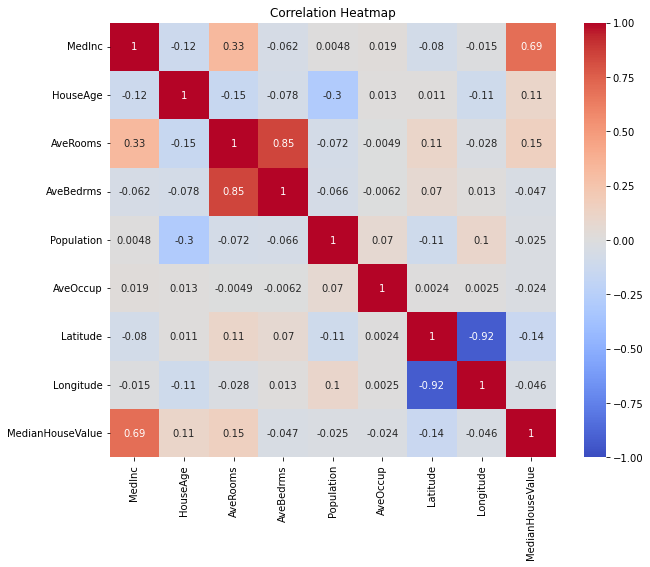

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Recall:** A heatmap visualizes the correlation matrix, providing a color-coded representation of feature correlations. Positive correlations are represented with warmer colors, while negative correlations are represented with cooler colors.

**Heatmap Interpretation:**

- **Positive Correlations**: Dark red shades represent strong positive correlations. For instance, `MedInc` (Median Income) has a strong positive correlation of 0.69 with `MedianHouseValue`.
  
- **Negative Correlations**: Dark blue shades represent strong negative correlations. As an example, `Latitude` has a strong negative correlation of -0.92 with `Longitude`, which is expected as moving northward (increasing latitude) typically means moving away from the prime meridian (decreasing longitude) for locations in the Western Hemisphere.

- **Neutral Correlations**: Pale colors close to white indicate little to no correlation. For example, the correlation between `Population` and `AveOccup` is -0.0048, which is nearly zero, meaning these two features are mostly unrelated.

### 3. **Analyze Target Variable**

To identify features most correlated with `MedianHouseValue`:

In [10]:
correlation_with_target = correlation_matrix['MedianHouseValue'].sort_values(ascending=False)
print(correlation_with_target)

MedianHouseValue    1.000000
MedInc              0.688075
AveRooms            0.151948
HouseAge            0.105623
AveOccup           -0.023737
Population         -0.024650
Longitude          -0.045967
AveBedrms          -0.046701
Latitude           -0.144160
Name: MedianHouseValue, dtype: float64


By sorting the correlations of features with our target variable (`MedianHouseValue`), we can easily identify which features have the strongest positive and negative relationships with the target.

- **Strongest Positive Correlation**: `MedInc` is the feature with the highest positive correlation to `MedianHouseValue`, with a value of 0.69. This suggests that areas with higher median incomes tend to have higher median house values.

- **Strongest Negative Correlation**: While no features show a particularly strong negative correlation with `MedianHouseValue`, the closest is `Latitude` with a value of -0.14. This might indicate that as you move northward, house values slightly decrease, but the correlation is not very strong.

### 4. Multicollinearity Check

To identify features that are highly correlated with each other:

In [15]:
# Setting a threshold for high correlation, e.g., 0.8
threshold = 0.8
high_corr_var = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            high_corr_var.append((colname1, colname2))

print(high_corr_var)

[('AveBedrms', 'AveRooms'), ('Longitude', 'Latitude')]


To visualize these high correlations:

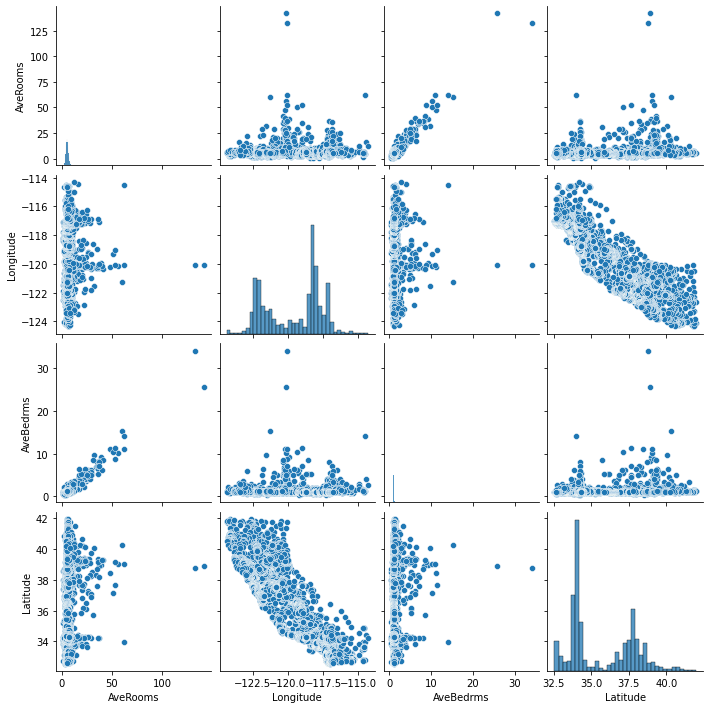

In [20]:
# Extract unique columns from the pairs to plot
unique_cols = list(set([col for pair in high_corr_var for col in pair]))

if unique_cols:
    sns.pairplot(df[unique_cols])
    plt.show()

1. **Latitude and Longitude**: The most evident multicollinear relationship is between `Latitude` and `Longitude`, with a correlation of -0.92. This is expected due to the geographical relationship between these two features.

2. **AveRooms and AveBedrms**: `AveRooms` (Average Rooms) and `AveBedrms` (Average Bedrooms) have a correlation of 0.85. This indicates a strong positive relationship between the number of rooms and the number of bedrooms in a house. It's logical since houses with more rooms are likely to have more bedrooms. However, for modeling purposes, having two variables that provide similar information can lead to multicollinearity, which may make coefficients hard to interpret.

In practical terms, multicollinearity can be problematic for linear regression. Given the high correlation between these pairs of features, it may be beneficial to consider using just one from each pair or engineering new features that capture the necessary information without redundancy.

---

### 5. Spatial Visualization

**Objective:** To visually explore the spatial distribution of housing data, focusing on geolocation and median house values.

- Geospatial Scatter Plot

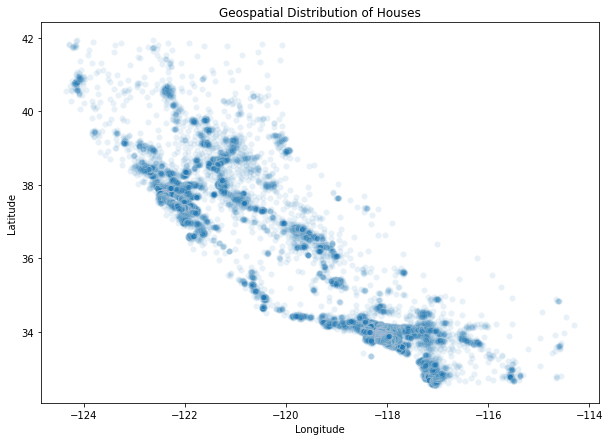

In [23]:
# Plotting
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], alpha=0.1)
plt.title("Geospatial Distribution of Houses")
plt.show()


- Color by Median House Value

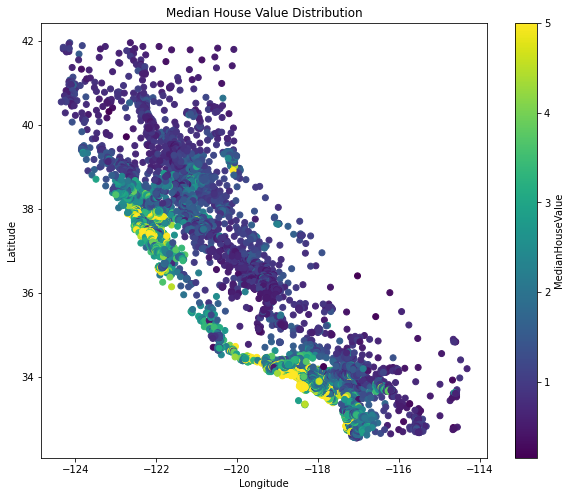

In [29]:
# The data
x = df['Longitude']
y = df['Latitude']
c = df['MedianHouseValue']

# Create the scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=c, cmap='viridis')
plt.colorbar(sc, label='MedianHouseValue')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value Distribution')

plt.show()

**Summary**

The scatter plot visualizes median house values across the latitude and longitude of California. For context, the state of California stretches roughly from latitude 32° to 42°N and longitude 114° to 125°W. Given the unique geography and topography of California, it's crucial to recognize its distinct shape when interpreting the data.

Key observations from the visualization are:

- **Geographical Spread**: California's vastness is evident with data points spanning from the north at the Oregon border, down to the southern border with Mexico, and from its western coastline to its eastern boundary with Nevada and Arizona.

- **Coastal Proximity**: The highest median house values are predominantly located along the coastline, especially in the southern coastal region. Coastal properties likely carry a premium due to factors like ocean views, beach access, and other associated coastal amenities.

- **Inland Variation**: As we move inland, there's a general decline in house values. However, certain inland pockets exhibit higher values, potentially surrounding major cities or other desirable residence regions.

- **Coastal vs. Inland**: While coastal regions generally command higher median house values, certain inland hubs also showcase comparable property values. This suggests that while coastal proximity is influential, other dynamics, such as proximity to economic centers or areas of interest, also matter.

Keeping in mind the familiar map shape of California, this visualization underscores the nuanced relationship between geography and property values across the state, revealing both anticipated and unique trends in housing costs.

---

## 4. Data Preprocessing

### 1. Separate Target and Features

To build our simple linear regression model, we will focus solely on the MedInc feature due to its high correlation with the target MedianHouseValue. Begin by separating the dataset into features (X) and the target variable (y). Then, extract the MedInc feature from the dataset for the regression model.

In [32]:
# Separate the features and the target variable
X = df[['MedInc']]
y = df['MedianHouseValue']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20640, 1)
Shape of y: (20640,)


- Separating the target variable from the features is crucial because in supervised machine learning, we train our models using the features to predict the target. Keeping them separate helps in organizing our data for training, validation, and evaluation. It ensures that our model doesn't inadvertently learn from the target variable itself during the training process.
 
- We have chosen to work with the `MedInc` feature for this task because it has a high correlation with `MedianHouseValue`, making it a potentially strong predictor. In simple linear regression, where we use just one feature to predict the target, it's beneficial to choose a feature that has a strong relationship with the target variable.

-  `X` has a shape of `(number_of_samples, 1)` since it is a 2D array containing only the `MedInc` feature for each sample. On the other hand, `y` has a shape of `(number_of_samples,)` because it's a 1D array representing the target variable for each sample.

### 2. Splitting the Dataset

In [33]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividing the dataset into training and testing sets allows us to assess the performance of our model on unseen data. By using 80% of the data for training and 20% for testing, we ensure a substantial amount for both model training and evaluation.

- We assigned a value to `random_state` to ensure reproducibility. The `random_state` parameter controls the shuffling applied to the data before applying the split. By setting a fixed number (like 42), we guarantee that the output of the split will be the same each time the script is run. This makes experiments easily replicable.

- `X_train` represents 80% of the original data while `X_test` represents the remaining 20%. The `train_test_split` function, by default, shuffles the dataset and divides it according to the specified test size. In our case, we've set `test_size=0.2`, which signifies that 20% of the data is reserved for testing and the rest for training.

In [34]:
print("Proportion of X_train:", len(X_train) / len(X))
print("Proportion of X_test:", len(X_test) / len(X))

Proportion of X_train: 0.8
Proportion of X_test: 0.2


## 5. Building a Simple Linear Regression

### 1. Create and Train our Model

Having split the data into training and testing sets, now it's time to initialize and train a simple linear regression model on the selected `MedInc` feature. Utilize the `LinearRegression` function from `sklearn.linear_model`.

In [35]:
# Initialize the linear regression model
simple_reg_model = LinearRegression()

# Train the model using the training subset
simple_reg_model.fit(X_train, y_train)

LinearRegression()

- In the context of machine learning and our linear regression model, the `.fit()` method is used to train the model on the provided training data. It computes the optimal parameters (coefficients) that will best describe the relationship between the input features (`X_train`) and the target variable (`y_train`).

- The linear regression model, especially when using libraries like Scikit-learn, can utilize the gradient descent optimization approach to adjust its parameters during the training phase. Gradient descent seeks to minimize the cost function, which in the case of linear regression, is typically the mean squared error between the predicted values and the actual values. Starting with an initial set of parameters, the model calculates the gradient of the cost function concerning each parameter and updates the parameters in the direction of the steepest descent. This iterative process continues until the gradient is very close to zero, indicating that the model has found an optimal (or near-optimal) set of parameters that minimize the cost function.

### 2. Evaluate Performance on Training Data

In [43]:
# Predict on training data
y_train_pred = simple_reg_model.predict(X_train)

# Calculate MSE and R^2
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Training R²: {r2_train:.2f}")

Training MSE: 0.70
Training R²: 0.48


- Evaluating the model's performance on the training data provides insight into how well the model is fitting the data it was trained on. It helps in diagnosing issues like underfitting or overfitting. 

    - If a model has a poor performance on the training data, it's likely underfitting, meaning the model is too simple to capture the underlying patterns in the data.
    - If a model has a very high performance on the training data but performs poorly on unseen data (test data), it's likely overfitting, which means the model is too complex and captures noise along with the underlying patterns.


- The R² value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value close to 1 indicates that a large proportion of the variance in the dependent variable is explained by the model. In simpler terms, the model fits the data very well.

**For our model:**
- The R² value is 0.48, which means that approximately 48% of the variance in the `MedianHouseValue` can be explained by the `MedInc` feature using the linear regression model. The remaining 52% of the variance might be explained by other factors not included in this simple linear regression model.

- The MSE (Mean Squared Error) value is 0.70. This represents the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a better fit of the model to the data.

**Interpretation of Results:**

- Given the R² value of 0.48, our simple linear regression model, using only the `MedInc` feature, explains about 48% of the variance in house values. This is a moderate R² value, suggesting that while `MedInc` is a relevant predictor, there might be other significant variables or interactions that could be considered to improve the model's performance. The MSE of 0.70 further reinforces the idea that there's room for improvement, as a perfect model would have an MSE of 0.

- To enhance model performance, you might consider using multiple regression (with more features) or exploring other types of regression models.

### 3. Visualize the Model's Fit on Training Data

Visualize how well our linear regression model fits the training data.

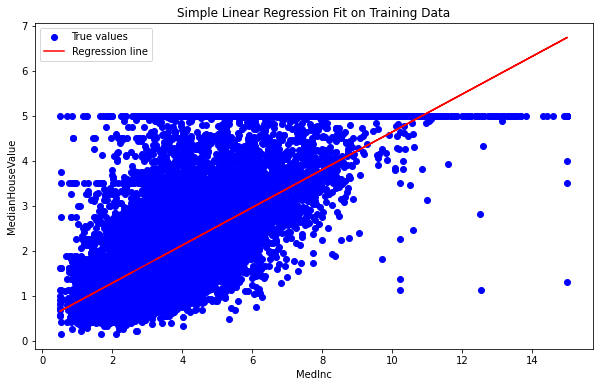

In [40]:
plt.figure(figsize=(10, 6))
# Scatter plot of true values
plt.scatter(X_train, y_train, color='blue', label='True values')

# Overlaying the regression line
plt.plot(X_train.values.ravel(), y_train_pred, color='red', label='Regression line')

plt.xlabel('MedInc')
plt.ylabel('MedianHouseValue')
plt.title('Simple Linear Regression Fit on Training Data')
plt.legend()
plt.show()

From the scatter plot visualization of our simple linear regression's fit on the training data, it's evident that the model captures an overall positive correlation between `MedInc` and `MedianHouseValue`. The regression line intersects the densest parts of the data distribution, indicating that as median income increases, the median house value tends to increase as well.

However, there are areas of concern in the model's performance. A prominent observation is the apparent saturation or capping around the `MedianHouseValue` of 5, where homes with varying incomes are associated with this consistent value. The regression line, in its quest to find the best fit, doesn't capture this data characteristic and continues to portray an upward trend.

Furthermore, the plot reveals greater variability in house values at higher income levels, as indicated by the increased scatter of data points around the regression line in the higher `MedInc` range. 

In terms of model diagnosis, the visualization is invaluable. It doesn't show signs of overfitting, as the regression line doesn't try to fit every small nuance of the data. However, there's a potential underfitting scenario. The linear model's simplicity might not capture specific data nuances, like the saturation effect observed. This suggests that a more intricate model might be better suited to address such complexities in the data.

### 4. Interpret the Model Parameters

Having visualized the fit of our simple linear regression model on the training data, we proceed to understanding the coefficients behind this fit.

To decode the parameters of our simple linear regression model, we'll first retrieve the slope and intercept.

In [41]:
# Getting the slope (coefficient) and intercept of the model
slope = simple_reg_model.coef_
intercept = simple_reg_model.intercept_

print(f"Slope (Coefficient) of MedInc: {slope[0]}")
print(f"Intercept of the model: {intercept}")

Slope (Coefficient) of MedInc: 0.4193384939381273
Intercept of the model: 0.4445972916907872


The slope, which is approximately 0.4193, reveals the relationship between MedInc (Median Income) and the median house value. Specifically, for every `$1,000` increase in median income, the median house value is predicted to rise by approximately `$419.34`.

The intercept, which is approximately 0.4446, symbolizes the predicted median house value when the MedInc is zero. While a median income of zero isn't realistic in real-world scenarios, the intercept serves as a foundational point for our linear model.

From the values of these coefficients, we can deduce that MedInc has a substantial influence on the median house value. The positive slope showcases that as the median income increases, the median house value is also expected to go up, indicating a direct relationship between them.

The linear regression equation based on the derived slope and intercept is:

$$
\text{MedianHouseValue} = 0.4193 \times \text{MedInc} + 0.4446
$$


This equation represents how the median house value changes with respect to the median income.


### 5. Assess Model on Test Data

Evaluate the model's performance on the test data. Predict the median house values for the test dataset using the MedInc feature and determine its accuracy.

In [44]:
# Predict on testing data
y_test_pred = simple_reg_model.predict(X_test)

# Calculate MSE and R^2 for test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Testing MSE: {mse_test:.2f}")
print(f"Training R²: {r2_train:.2f}")

Testing MSE: 0.71
Training R²: 0.48


- It's essential to evaluate the model on test data to gauge its performance on unseen data. This assessment provides insight into how the model will likely fare in real-world scenarios.

- If a model demonstrates superior performance on training data but doesn't perform as well on test data, it might be overfitting. Overfitting indicates that while the model has captured the intricacies of the training data, it may not generalize well to new, unseen data.

- The obtained MSE (Mean Squared Error) for the test data is 0.71. This value quantifies the average squared difference between the predicted and actual values. By evaluating the instances with high errors and understanding the underlying reasons, we can refine our model or features to address these discrepancies.

- The R² score for the test data is 0.48. This statistic informs us that approximately 48% of the variability in the median house values is explained by the model. The closer the R² is to 1, the better the model explains the variability of the response data around its mean.

- Predictions for median house values are determined using the MedInc feature according to the linear relationship specified by the model. This relationship can be described with the equation: 
$$
\text{MedianHouseValue_predicted} = 0.4193 \times \text{MedInc} + 0.4446
$$
  For each unit increase in MedInc, the median house value rises by about 0.4193 units. When MedInc is 0, the starting value for the median house value is approximately 0.4446.

### 6. Visualizing the Linear Regression on Test Data

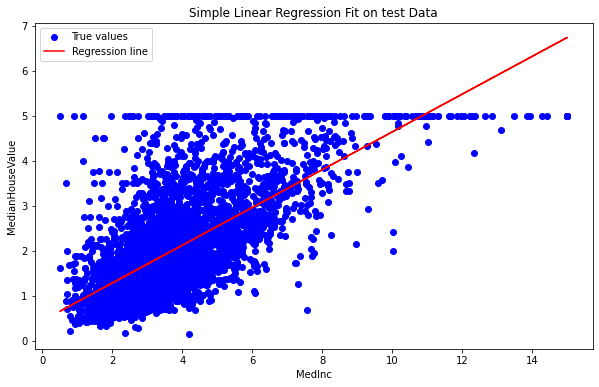

In [47]:
plt.figure(figsize=(10, 6))
# Scatter plot of true values
plt.scatter(X_test, y_test, color='blue', label='True values')

# Overlaying the regression line
plt.plot(X_test.values.ravel(), y_test_pred, color='red', label='Regression line')

plt.xlabel('MedInc')
plt.ylabel('MedianHouseValue')
plt.title('Simple Linear Regression Fit on test Data')
plt.legend()
plt.show()

- The regression line adeptly captures the upward trend in the test data, suggesting that as median income (MedInc) rises, so does the median house value. This trend demonstrates that houses in areas with elevated median incomes are often valued higher.

- This positive relationship between MedInc and median house value is intuitive and aligns with real-world expectations. Neighborhoods with higher incomes typically boast more expensive houses.

- Recalling the visualization from the training data, the pattern in the test data is consistent. This similarity indicates that the model isn't merely overfitting to the training data but is generalizing effectively to unseen data.

- While the regression line provides a good fit overall, deviations are evident, especially at the MedInc extremes. These outliers might influence our model's predictions, potentially causing certain inaccuracies. Addressing these outliers or even considering a more intricate model could further enhance predictions.

In conclusion, the model seems to be performing reasonably well on the test data, especially when considering its simplicity and the inherent noise in real-world data. However, a more complex model or additional features might help in capturing the nuances better.